# Classification of Breast Cancer using Wisconsin Breast Cancer Dataset

* Author : Alperen Demirci 
* Date : 17/02/2024
* Mail : alperendemirci65@gmail.com

## Introduction
The aim of this notebook is to predict the classify whether if a entry has breast cancer or not.

First objective is to select the accurate dataset and then apply the necessary preprocessing steps. After that, we will apply the classification algorithms to the dataset and compare the results.

## What will we do?
1. Data Preprocessing
    * Missing Values
    * Outliers
    * Feature Scaling
    * Encoding

2. Exploratory Data Analysis
    * Correlation
    * Distribution of the Features

3. Model Building
    * Support Vector Classifier
    * Random Forest Classifier
    * Logistic Regression Classifier
    * XGBoost Classifier
    * Neural Network Classifier

4. Model Evaluation

5. Conclusion


## Dataset Selection
* We have three dataset options for this task. 
    * Breast Cancer Dataset (https://archive.ics.uci.edu/dataset/14/breast+cancer)
    * Breast Cancer Wisconsin (Diagnostic) Data Set (https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)
    * Breast Cancer Wisconsin (Original) Data Set (https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original)

Our choice will be based on different parameters such as number of features, number of entries, and the quality of the dataset.

We will compare the two datasets and select the most suitable one for our task.

* Breast Cancer Dataset
    * Number of features : 9
    * Number of entries : 286
    * Quality of the dataset : 7.5/10
    * Citation Number: 147
    * View Count: 107940
    * Has missing values : Yes
    * Info: This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)This data set includes 201 instances of one class and 85 instances of another class.  The instances are described by 9 attributes, some of which are linear and some are nominal.


* Breast Cancer Wisconsin (Diagnostic) Data Set
    * Number of features : 30
    * Number of entries : 569
    * Quality of the dataset : 9/10
    * Citation Number: 37
    * View Count: 282759
    * Has missing values : No
    * Info: Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


* Breast Cancer Wisconsin (Original) Data Set
    * Number of features : 10
    * Number of entries : 699
    * Quality of the dataset : 8/10
    * Citation Number: 6
    * View Count: 101257
    * Has missing values : Yes
    * Info: This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)This data set includes 201 instances of one class and 85 instances of another class.  The instances are described by 9 attributes, some of which are linear and some are nominal.

### Features
* Since it takes too much space to write all the features here, I will only write the comment about the features.

* Breast Cancer Wisconsin (Diagnostic) Data Set features are all **continous variables** which helps us to apply the classification algorithms. Also, it has 30 features which is a good number for the classification task. When we check the distribution for the features from Kaggle, we can see that the features are normally distributed which is a good sign for the classification task.

* Breast Cancer Dataset features are multivariate which means we need to work on preprocessing more than Wisconsin dataset. Also, it has 9 features which is not bad for a classification task. Negative side of the dataset is that all continuous variables are binned which loses information about the dataset.

* Breast Cancer Wisconsin (Original) Data Set features are all **integers**. Also, it has 10 features which is not bad for a classification task. Negative side of the dataset is that all variables are compressed in an integer data type instead of float which loses information about the dataset.
However, the dataset is obtanied from the same source with the Wisconsin (Diagnostic) Data Set with a different approach. Therefore, we can say that the quality of the dataset is good.


### Conclusion
* The provided dataset on the assignment pdf is Breast Cancer Wisconsin (Original) Data Set. Comparing this dataset with the other two, we can say that the quality of the dataset is good and it has a good number of features for the classification task. However, in my opinion the best dataset for the classification task is Breast Cancer Wisconsin (Diagnostic) Data Set. It has the most number of features and the quality of the dataset is the best among the three. Although it has the most number of features, it does not have missing values(unlike Breast Cancer Wisconsin (Original) ) which is a good sign for the dataset.

* If I rank these 3 datasets, I would rank them as follows:
    1. Breast Cancer Wisconsin (Diagnostic) Data Set
    2. Breast Cancer Wisconsin (Original) Data Set
    3. Breast Cancer Dataset

* Since the Original dataset is provided in the pdf and the quality of the dataset is good, I will use the Original dataset for the classification task. If I had to make a choice, I would choose the Wisconsin (Diagnostic) Data Set since it's widely used in Machine Learning Community and requires less preprocessing.



**Selected Dataset:** Breast Cancer Wisconsin (Original)

Let's import the necessary libraries and dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Features of the dataset:
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

In [2]:
l_cols = ['id_number','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']

In [3]:
df_read = pd.read_csv('breast-cancer-wisconsin.data',header=None)
df_read.columns = l_cols

In [4]:
df_read

,id_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


So let's start with the first step, Data Preprocessing.

## Data Preprocessing

Let's start with understanding the dataset by displaying the info and description of the columns.

In [5]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_number                    699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_of_cell_size      699 non-null    int64 
 3   uniformity_of_cell_shape     699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df_read.describe()

,id_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


We can see that the id_number column is not a feature for the classification task. Therefore, we need to drop this column.
But first let's check if there are any missing values in the dataset.

In [7]:
df_read.isnull().sum()

id_number                      0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [8]:
df_read.isna().sum()

id_number                      0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [9]:
## Filling the missing values with -99999
df_read.replace('?',-99999,inplace=True)

In [10]:
df_read.describe()

,id_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


* We can see that there are no missing values in the dataset. Therefore, we can move on to the next step which is dropping the id_number column.

* Before dropping the id_number column, let's check if it has any effect on the classification task. We can check the correlation between the id_number and the class column.

<Axes: >

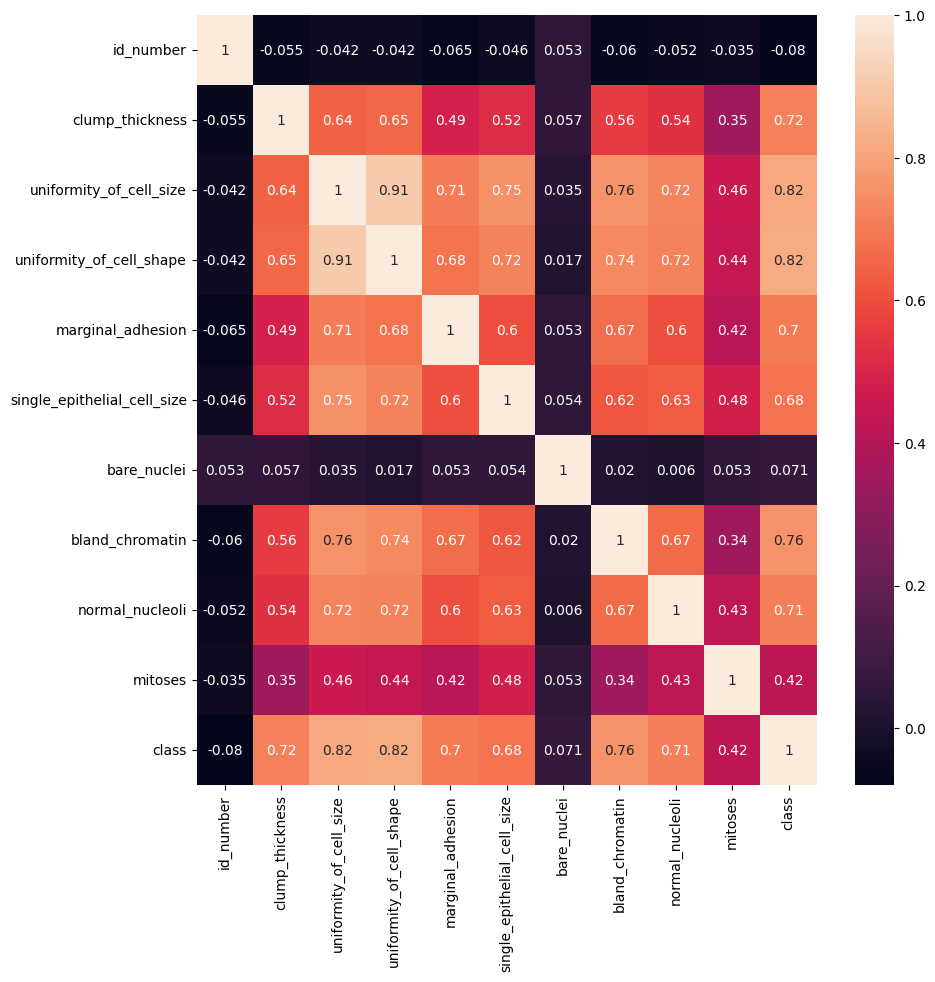

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df_read.corr(),annot=True)

* Since the correlation is very low, we can drop the id_number column.

In [12]:
df_read.drop(['id_number'],axis=1,inplace=True)

In [13]:
df_read.describe()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [14]:
for col in df_read.columns:
    print(col,df_read[col].isna().sum())
    print(col,df_read[col].isnull().sum())

clump_thickness 0
clump_thickness 0
uniformity_of_cell_size 0
uniformity_of_cell_size 0
uniformity_of_cell_shape 0
uniformity_of_cell_shape 0
marginal_adhesion 0
marginal_adhesion 0
single_epithelial_cell_size 0
single_epithelial_cell_size 0
bare_nuclei 0
bare_nuclei 0
bland_chromatin 0
bland_chromatin 0
normal_nucleoli 0
normal_nucleoli 0
mitoses 0
mitoses 0
class 0
class 0


In [15]:
df_read['bare_nuclei'].value_counts()

bare_nuclei
1         402
10        132
2          30
5          30
3          28
8          21
4          19
-99999     16
9           9
7           8
6           4
Name: count, dtype: int64

* As you can see we have some missing values in the bare_nuclei column. We need to handle these missing values before moving on to the next step.
* Since the missin value - size of the dataset ratio is very low(16/699 = %2.2), we can drop the missing values from the dataset.

In [16]:
## Drop the rows with missing values
df_read = df_read[df_read['bare_nuclei'] != -99999]

In [17]:
# Step 1: Check for non-numeric values
df_read['bare_nuclei'] = pd.to_numeric(df_read['bare_nuclei'], errors='coerce')

# Step 2: Convert to float
df_read['bare_nuclei'] = df_read['bare_nuclei'].astype(int)

/var/folders/03/r7dntbdd7d7411fzhxx8p08c0000gn/T/ipykernel_22141/3436217818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read['bare_nuclei'] = pd.to_numeric(df_read['bare_nuclei'], errors='coerce')
/var/folders/03/r7dntbdd7d7411fzhxx8p08c0000gn/T/ipykernel_22141/3436217818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read['bare_nuclei'] = df_read['bare_nuclei'].astype(int)


In [18]:
df_read.shape

(683, 10)

In [19]:
df_read['bare_nuclei'].value_counts()

bare_nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64

In [20]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump_thickness              683 non-null    int64
 1   uniformity_of_cell_size      683 non-null    int64
 2   uniformity_of_cell_shape     683 non-null    int64
 3   marginal_adhesion            683 non-null    int64
 4   single_epithelial_cell_size  683 non-null    int64
 5   bare_nuclei                  683 non-null    int64
 6   bland_chromatin              683 non-null    int64
 7   normal_nucleoli              683 non-null    int64
 8   mitoses                      683 non-null    int64
 9   class                        683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


## Outliers

* In order to check the outliers, we can use the boxplot for each feature. We can see that there are outliers in the dataset. Therefore, we need to apply the necessary steps to remove the outliers.

<Axes: >

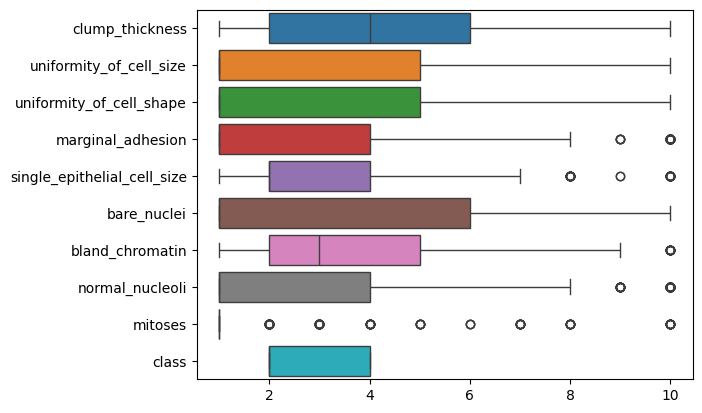

In [21]:
sns.boxplot(df_read,orient='h')

* We see that marginal_adhesion, single_epithelial_cell_size, bland_chromatin, normal_nucleoli, and mitoses have outliers. We will check the number of outliers for each feature and then handle them.
* We will use IQR method to detect the outliers.

In [22]:
l_outliers = ['marginal_adhesion', 'single_epithelial_cell_size', 'bland_chromatin', 'normal_nucleoli', 'mitoses']

for col in l_outliers:
    IQR = df_read[col].quantile(0.75) - df_read[col].quantile(0.25)
    lower_bound = df_read[col].quantile(0.25) - (IQR * 1.5)
    upper_bound = df_read[col].quantile(0.75) + (IQR * 1.5)

    print("Number of outliers in column ",col ," are ",df_read[(df_read[col] < lower_bound) | (df_read[col] > upper_bound)].shape[0])

Number of outliers in column  marginal_adhesion  are  59
Number of outliers in column  single_epithelial_cell_size  are  54
Number of outliers in column  bland_chromatin  are  20
Number of outliers in column  normal_nucleoli  are  75
Number of outliers in column  mitoses  are  120


* Since the number of outliers have very high percentage (max 120/683 = %17.5), we will not remove the outliers from the dataset. Instead we will check the distributions and use the necessary feature scaling method to handle the outliers.

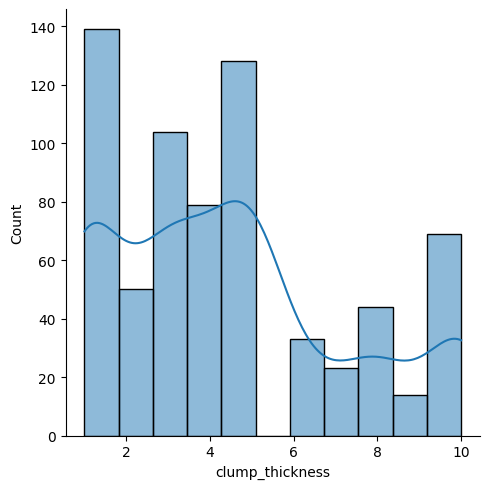

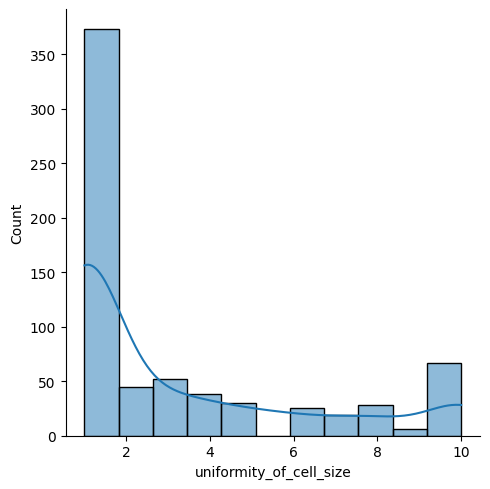

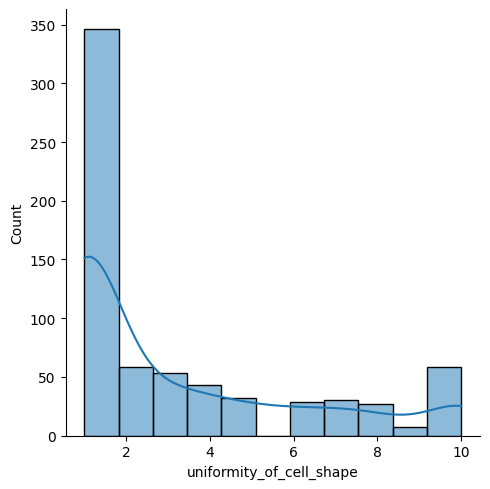

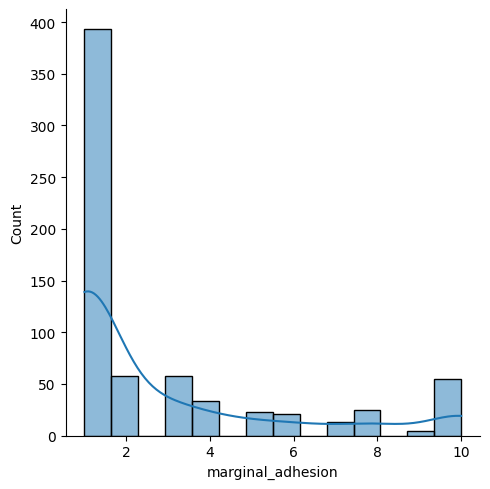

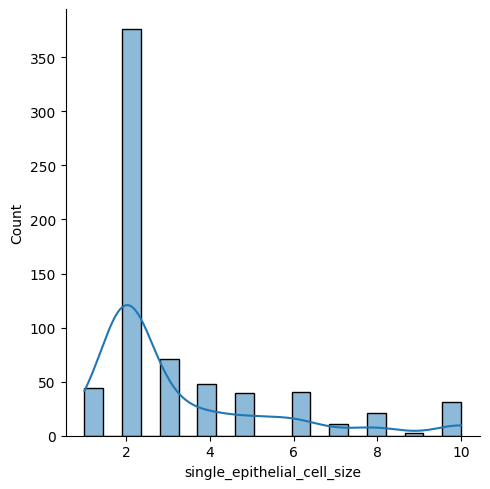

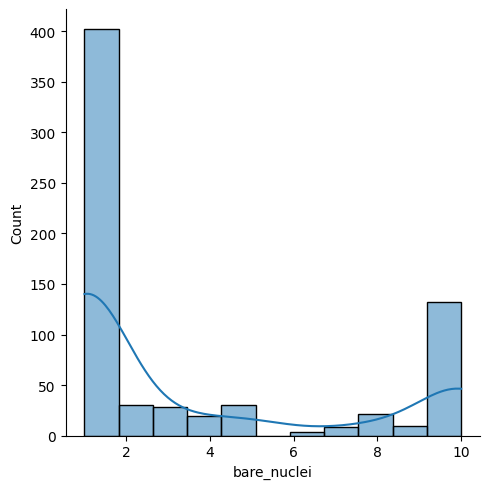

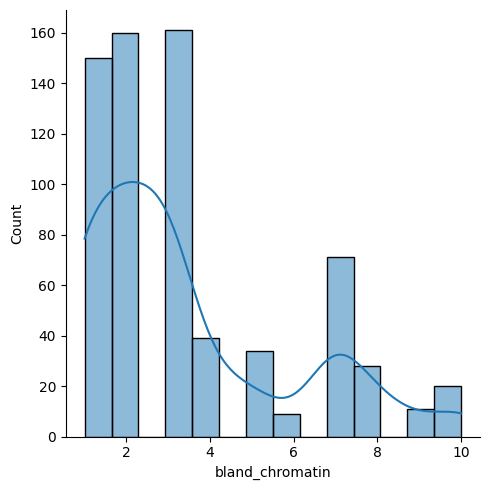

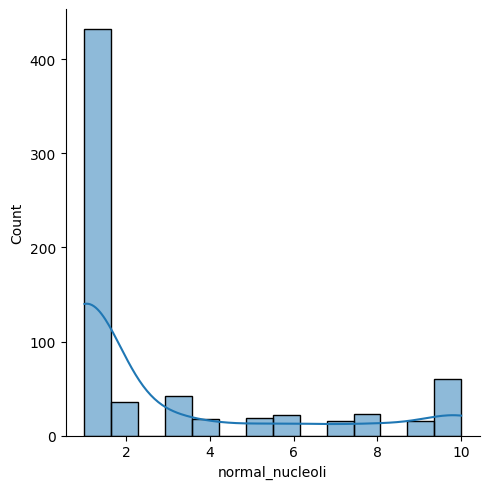

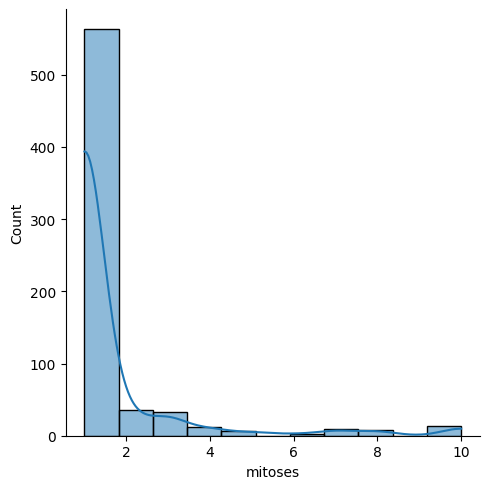

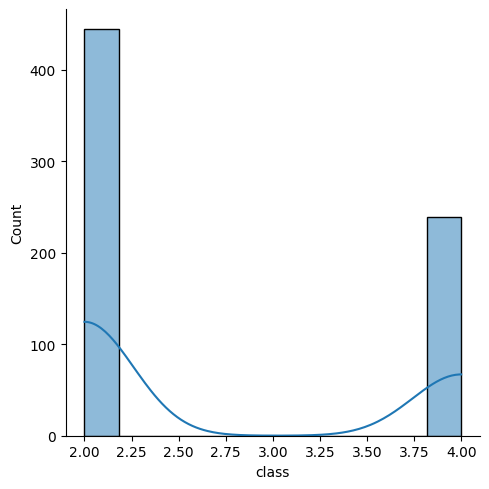

In [23]:
for col in df_read.columns:
    sns.displot(df_read[col],kde=True)

* We can see that the features are not normally distributed. We have three choices to handle this problem. We can use the log transformation or drop the outliers. 

In [24]:
df_drop_outliers = df_read.copy()
for col in l_outliers:
    IQR = df_drop_outliers[col].quantile(0.75) - df_drop_outliers[col].quantile(0.25)
    lower_bound = df_drop_outliers[col].quantile(0.25) - (IQR * 3)
    upper_bound = df_drop_outliers[col].quantile(0.75) + (IQR * 3)

    df_drop_outliers = df_drop_outliers[(df_drop_outliers[col] > lower_bound) & (df_drop_outliers[col] < upper_bound)]
    print("Column: ",col,", Shape:",df_drop_outliers.shape)

Column:  marginal_adhesion , Shape: (683, 10)
Column:  single_epithelial_cell_size , Shape: (652, 10)
Column:  bland_chromatin , Shape: (637, 10)
Column:  normal_nucleoli , Shape: (580, 10)
Column:  mitoses , Shape: (0, 10)


In [25]:
df_drop_outliers.shape

(0, 10)

* As seen, dropping the outliers doesn't work since the number of outliers are very high in some columns. Therefore, we try to use the log transformation to handle the outliers.

In [26]:
df_log_transformed = df_read.copy()
for col in df_log_transformed.columns:
    df_log_transformed[col] = np.log1p(df_log_transformed[col] + 1e-6)

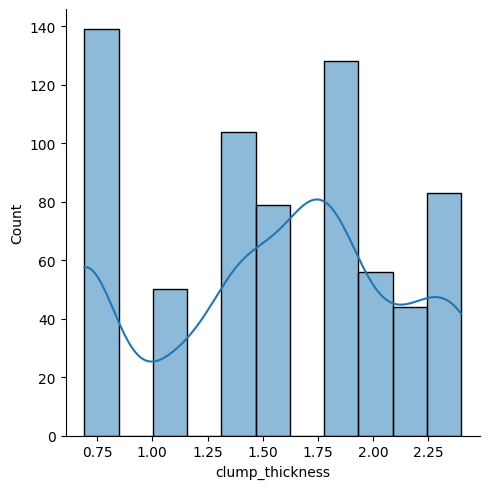

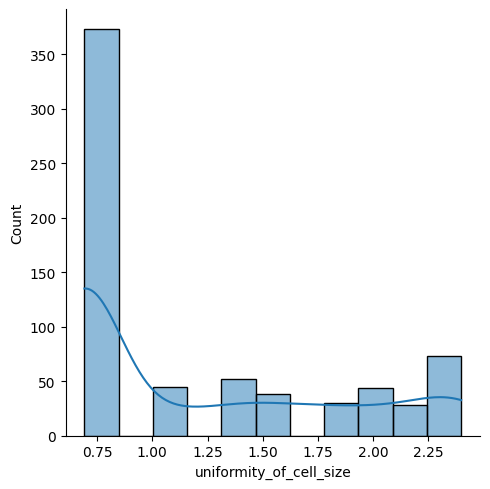

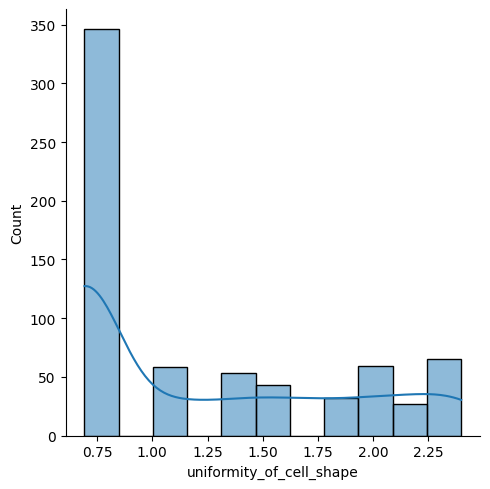

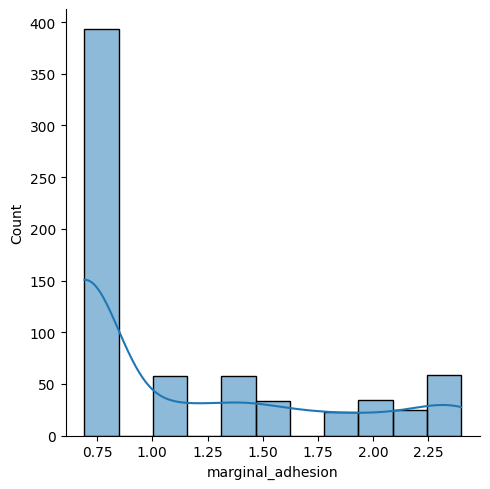

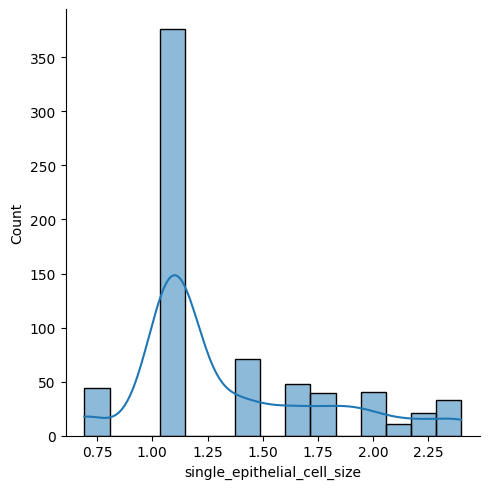

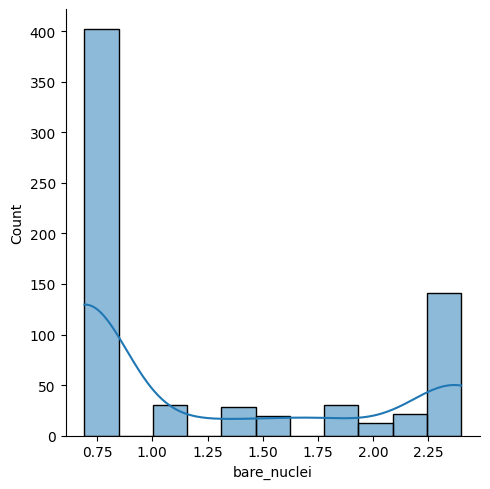

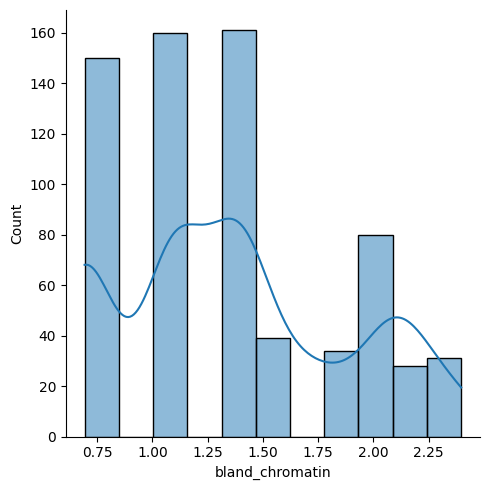

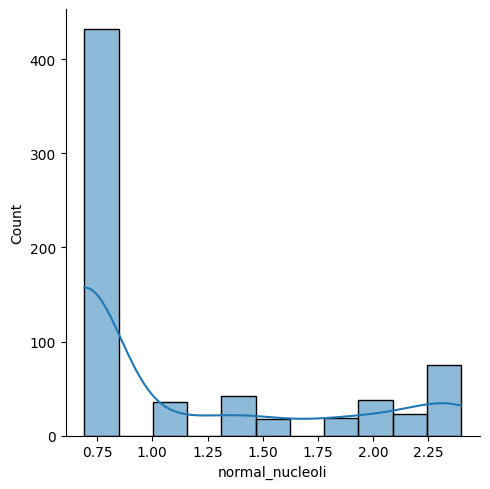

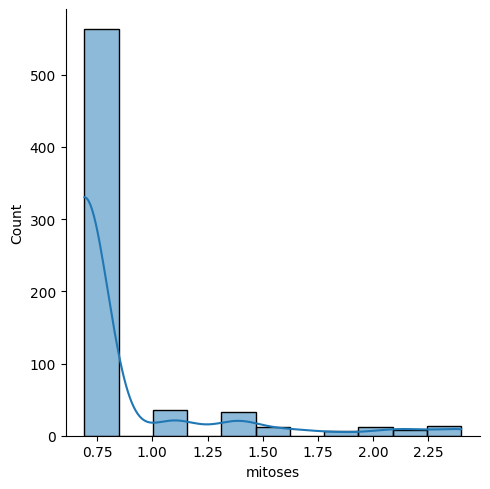

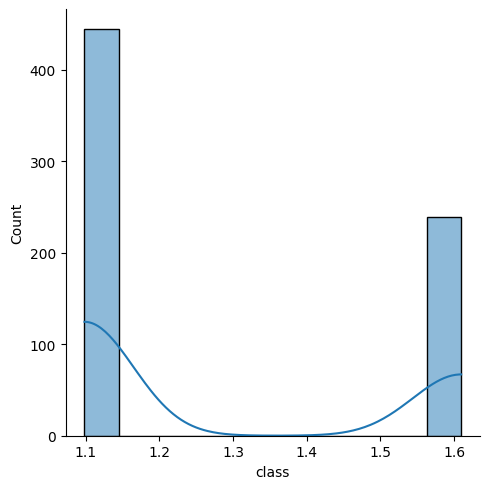

In [27]:
for col in df_log_transformed.columns:
    sns.displot(df_log_transformed[col],kde=True)

We have two chocies: using the raw data or using the log transformed data. 
* We will check the distribution of the log transformed data and then decide which one to use.

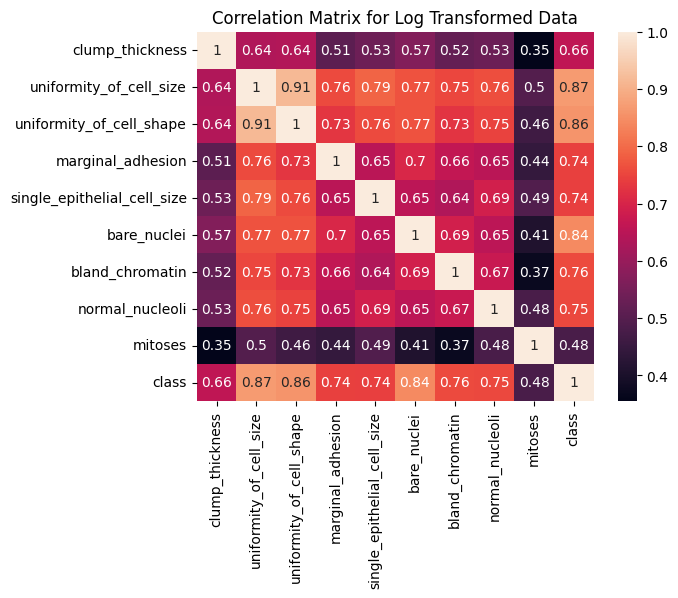

In [28]:
sns.heatmap(df_log_transformed.corr(),annot=True)
plt.title('Correlation Matrix for Log Transformed Data')
plt.show()

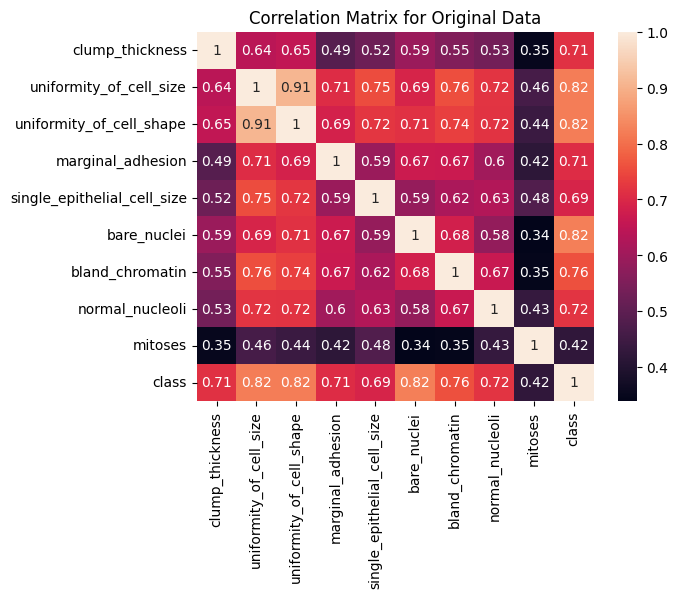

In [29]:
sns.heatmap(df_read.corr(),annot=True)
plt.title('Correlation Matrix for Original Data')
plt.show()

When we check the correlation matrix for the log transformed data, we can see that the correlation between the features and target are higher than the original data. Therefore, we will use the log transformed data for the classification task.

* Winner=
Log Transformed Data...

In [30]:
df_curr = df_log_transformed.copy()

## Feature Scaling

* We will use the Robust Scaler for the log transformed data.
* The reason why we are using the Robust scaler is that it's robust to outliers since it uses IQR instead of using the mean and standard deviation.
(Unlike Z-Score)

In [31]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_curr = scaler.fit_transform(df_curr)

In [32]:
df_curr = pd.DataFrame(df_curr,columns=df_log_transformed.columns)

In [33]:
df_curr.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,0.215180,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
1,0.215180,0.834044,0.834044,1.198978,1.920086,1.360791,0.0,0.442507,0.0,0.0
2,-0.263359,0.000000,0.000000,0.000000,0.000000,0.323657,0.0,0.000000,0.0,0.0
3,0.397112,1.369070,1.369070,0.000000,0.563171,0.731416,0.0,1.512942,0.0,0.0
4,0.000000,0.000000,0.000000,0.756471,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [34]:
df_curr.describe()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,-0.070660,0.460736,0.484413,0.481533,0.471705,0.431420,-0.042764,0.466323,0.156349,0.349927
std,0.655494,0.577846,0.569772,0.653586,0.836723,0.569484,0.735565,0.686652,0.388656,0.477296
min,-1.081427,0.000000,0.000000,0.000000,-0.793745,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,-0.602888,0.000000,0.000000,0.000000,0.000000,0.000000,-0.415037,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.397112,1.000000,1.000000,1.000000,1.000000,1.000000,0.584963,1.000000,0.000000,1.000000
max,0.930555,1.551729,1.551729,1.860488,2.543496,1.360791,1.459432,1.860488,1.704748,1.000000


* You can see that the scaler kinda transformed the class feature to binary. Let's check if this is true.

In [35]:
df_curr['class'].value_counts()

class
0.0    444
1.0    239
Name: count, dtype: int64

* Since it has only 2 unique values, we can say that the class feature is binary. Therefore, we don't need to apply the encoding step for the class feature. Although it's not necessary, we will convert this columns' data type to boolean to use memory more efficiently.

In [36]:
df_curr['class'] = df_curr['class'].astype(bool)

In [37]:
df_curr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clump_thickness              683 non-null    float64
 1   uniformity_of_cell_size      683 non-null    float64
 2   uniformity_of_cell_shape     683 non-null    float64
 3   marginal_adhesion            683 non-null    float64
 4   single_epithelial_cell_size  683 non-null    float64
 5   bare_nuclei                  683 non-null    float64
 6   bland_chromatin              683 non-null    float64
 7   normal_nucleoli              683 non-null    float64
 8   mitoses                      683 non-null    float64
 9   class                        683 non-null    bool   
dtypes: bool(1), float64(9)
memory usage: 48.8 KB


In [38]:
df_curr.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,0.215180,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,False
1,0.215180,0.834044,0.834044,1.198978,1.920086,1.360791,0.0,0.442507,0.0,False
2,-0.263359,0.000000,0.000000,0.000000,0.000000,0.323657,0.0,0.000000,0.0,False
3,0.397112,1.369070,1.369070,0.000000,0.563171,0.731416,0.0,1.512942,0.0,False
4,0.000000,0.000000,0.000000,0.756471,0.000000,0.000000,0.0,0.000000,0.0,False


* We've finished the scaling, now we'll check the distribution of our features again to see if the scaling worked.

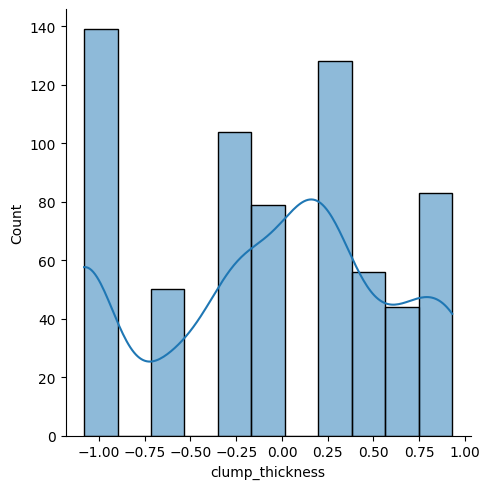

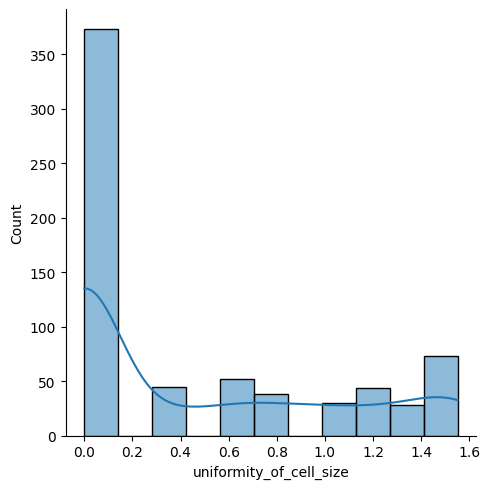

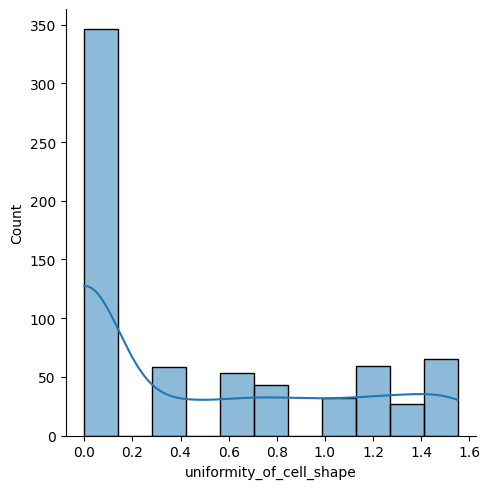

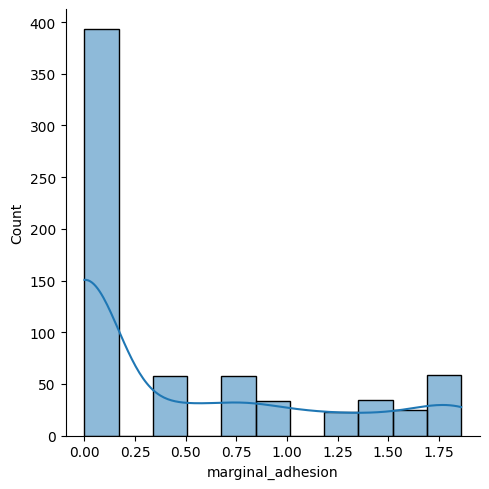

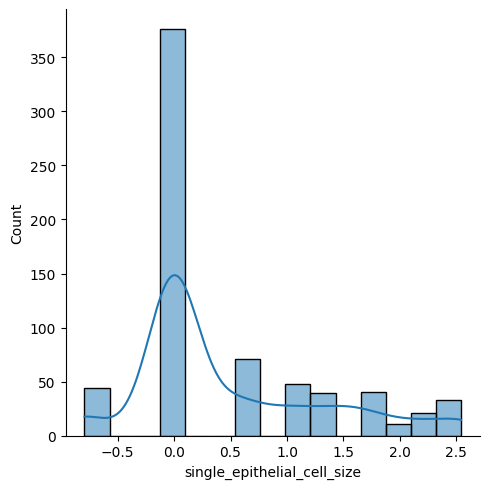

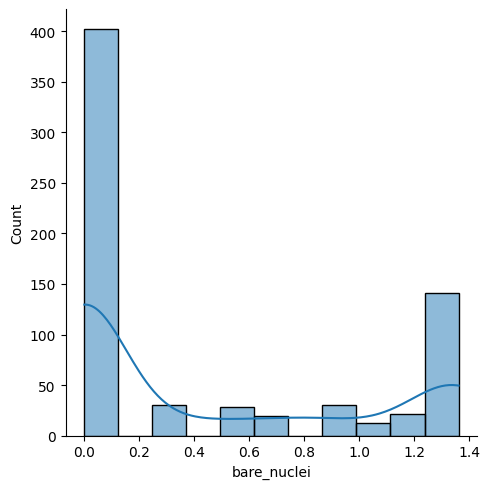

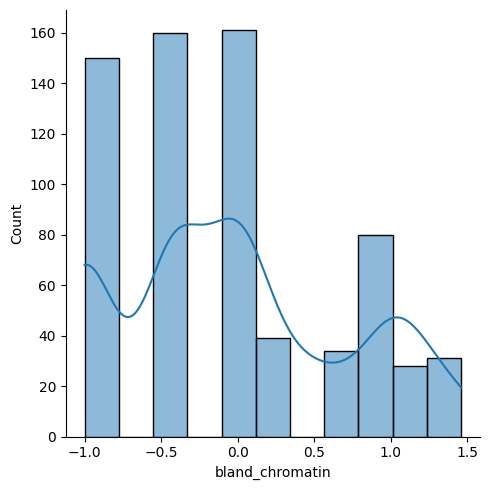

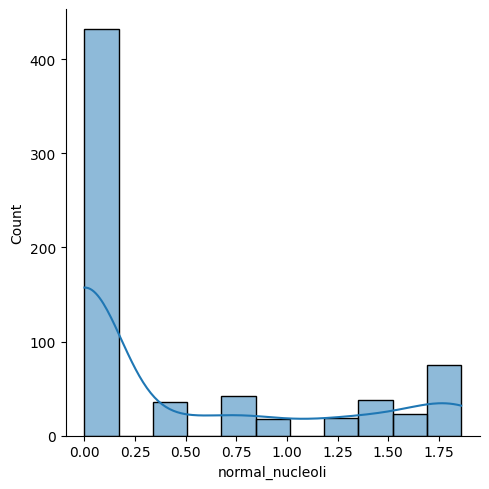

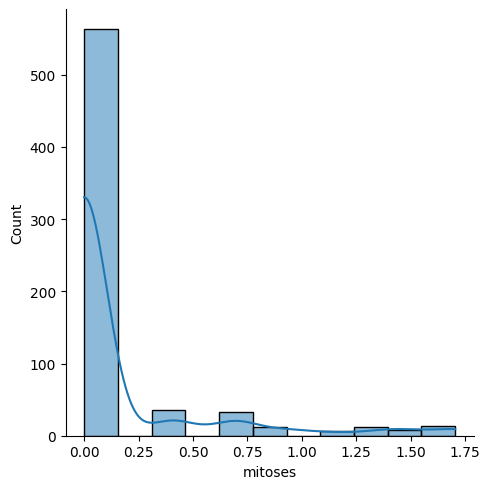

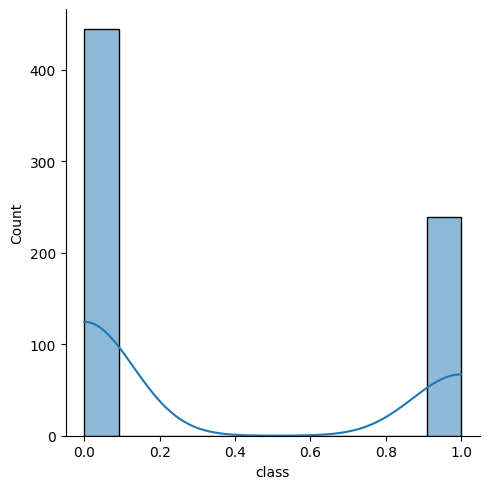

In [39]:
for col in df_curr.columns:
    sns.displot(df_curr[col],kde=True)

* We can see that there is a slight but positive difference on the distributions of the features. Therefore, we can move on to the next step which is Model Building.

## Encoding 
* We don't need to apply the encoding step for the class feature since the scaler handled it. Therefore, we can move on to the next step which is EDA.

## Exploratory Data Analysis(EDA)

* We will start with the correlation matrix to understand the relationships between the features and the target.

<Axes: >

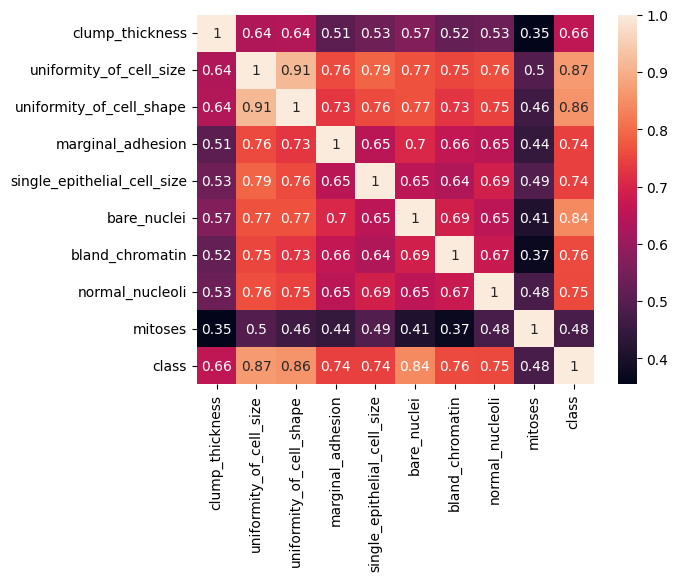

In [40]:
sns.heatmap(df_curr.corr(),annot=True)

* We can see that the correlation between the features and the target is high which is a good sign for the classification task.
* We can see that the correlation between the features are also high which is not a good sign for the classification task. However, we will select some of the features to use in the classification task.

* So the uniformity of cell size, uniformity of cell shape features have synergy effect on each other. Therefore, we can use only one of them in the classification task. We will use the uniformity of cell size feature since it has higher correlation with the target.

* We'll check the heatmap after dropping the uniformity of cell shape feature.

In [41]:
df_eda = df_curr.drop(['uniformity_of_cell_shape'],axis=1)

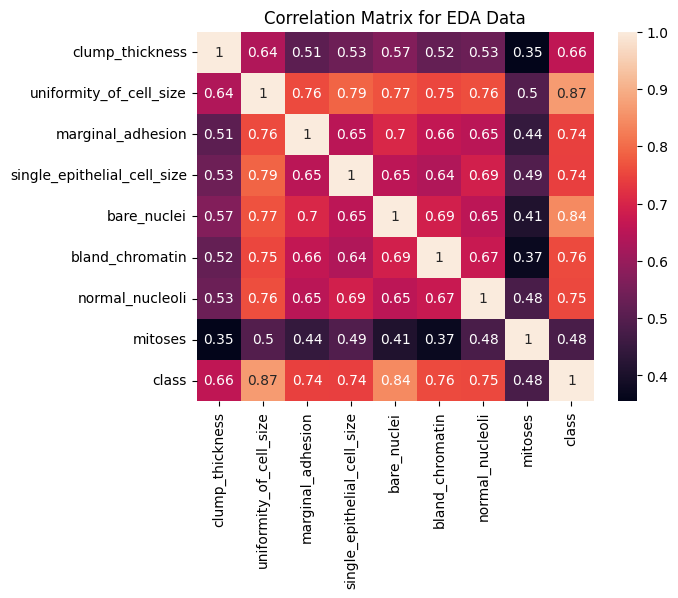

In [42]:
sns.heatmap(df_eda.corr(),annot=True)
plt.title('Correlation Matrix for EDA Data')
plt.show()

* Uniformity of cell size have high correlation with all other features but we will not drop this feature since it has high correlation with the target.

* Let's plot the relation between target and features.

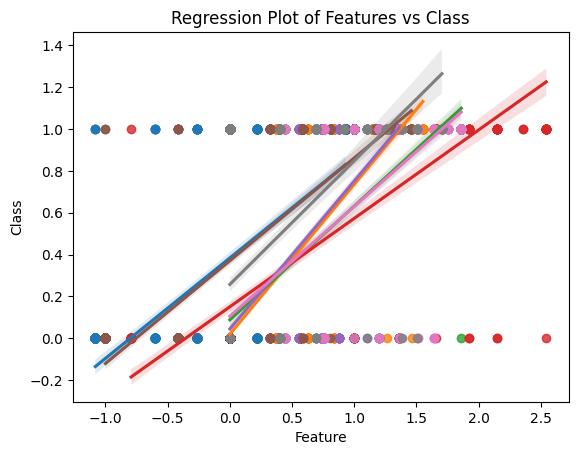

In [43]:
for col in df_eda.drop('class',axis=1).columns:
    sns.regplot(x=col,y='class',data=df_eda)

plt.xlabel('Feature')
plt.ylabel('Class')
plt.title('Regression Plot of Features vs Class')
plt.show()


## Clustering with PCA (Bonus)

* We will use the PCA to reduce the dimension of the dataset and then apply the KMeans clustering to see if the data is seperable or not.
* We will use the first two principal components to visualize the dataset.
* Lets' check the explained variance ratio to decide how many principal components we will use.

In [44]:
## Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_eda.drop('class',axis=1))
print(pca.explained_variance_ratio_)

[0.68815845 0.07261087]


* We will use the first two principal components since they explain more than 50% of the variance.

In [45]:
df_pca = pca.transform(df_eda.drop('class',axis=1))
df_pca = pd.DataFrame(df_pca,columns=['PC1','PC2'])
df_pca['class'] = df_eda['class']

Let's plot the PCA components and the target to see if the data is seperable or not.

Text(0.5, 1.0, 'PCA Plot')

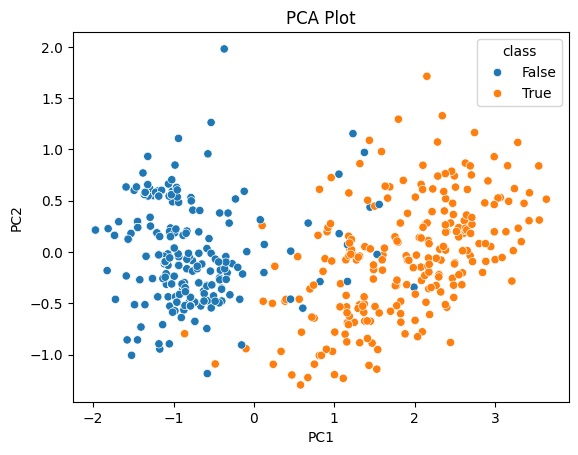

In [46]:
## Plotting the PCA

sns.scatterplot(x='PC1',y='PC2',data=df_pca,hue='class')
plt.title('PCA Plot')

* We can see that the PCA components can seperate the data into 2 clusters. Therefore, we can say that the data is seperable.
* We'll try to use PCA clusters as a feature in the classification task and see if we can reach to a better classification.
* But first, let's cluster the data with KMeans

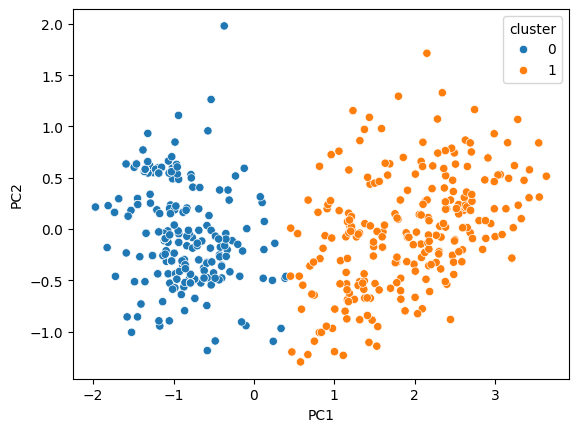

In [47]:
## Applying KMeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,n_init='auto')

kmeans.fit(df_eda.drop('class',axis=1))

df_pca['cluster'] = kmeans.labels_

sns.scatterplot(x='PC1',y='PC2',data=df_pca,hue='cluster')
plt.show()

* Let's check the silhouette score to see if the clusters are real or not.

In [48]:
from sklearn.metrics import silhouette_score
silhouette_score(df_pca.drop(['class','cluster'],axis=1),kmeans.labels_)

0.6908584013567303

The silhoutte score as 0.7 is a good score for the clustering task. Therefore, we can say that the clusters are real.

* Let's draw the heatmap once more.

In [49]:
df_eda['cluster'] = kmeans.labels_

In [50]:
df_eda.head()

,clump_thickness,uniformity_of_cell_size,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,cluster
0,0.215180,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,False,0
1,0.215180,0.834044,1.198978,1.920086,1.360791,0.0,0.442507,0.0,False,1
2,-0.263359,0.000000,0.000000,0.000000,0.323657,0.0,0.000000,0.0,False,0
3,0.397112,1.369070,0.000000,0.563171,0.731416,0.0,1.512942,0.0,False,1
4,0.000000,0.000000,0.756471,0.000000,0.000000,0.0,0.000000,0.0,False,0


<Axes: >

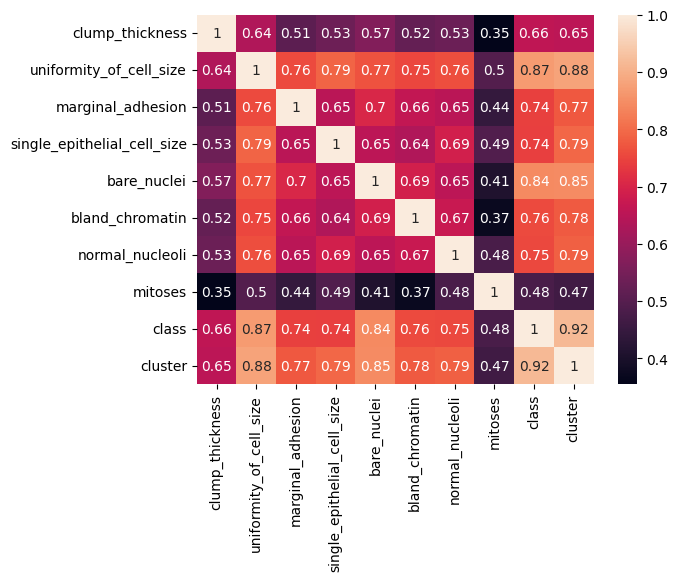

In [51]:
sns.heatmap(df_eda.corr(),annot=True)

* We may have to inverse the clusters to match with the target feature and then redraw the correlation heatmap.
* The code for that is below.

In [52]:
df_eda['cluster'] = df_eda['cluster'].replace({1:0,0:1})

In [53]:
## Code for changing the order of features class and cluster
cols = df_eda.columns.tolist()
cols = cols[:-2] + cols[-1:] + cols[-2:-1]
df_eda = df_eda[cols]

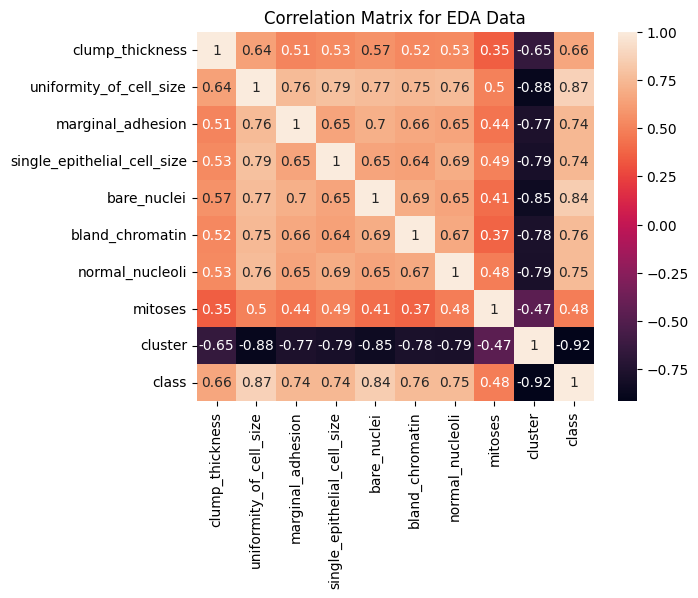

In [54]:
sns.heatmap(df_eda.corr(),annot=True)
plt.title('Correlation Matrix for EDA Data')
plt.show()

* We can see that we've obtained a better correlation heatmap with the PCA clusters. Therefore, we will use the PCA clusters as a feature in the classification task.

* Now we can move on to the next step which is Model Building.

Let's save the dataset and move on to the next step.

In [55]:
df_final = df_eda.copy()
df_final.to_csv('breast_cancer_final.csv',index=False)

## Model Building

In [56]:
df = pd.read_csv('breast_cancer_final.csv')

In [57]:
df.head()

,clump_thickness,uniformity_of_cell_size,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,cluster,class
0,0.215180,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1,False
1,0.215180,0.834044,1.198978,1.920086,1.360791,0.0,0.442507,0.0,0,False
2,-0.263359,0.000000,0.000000,0.000000,0.323657,0.0,0.000000,0.0,1,False
3,0.397112,1.369070,0.000000,0.563171,0.731416,0.0,1.512942,0.0,0,False
4,0.000000,0.000000,0.756471,0.000000,0.000000,0.0,0.000000,0.0,1,False


Let's import the necessary libraries for models and then split the dataset into train and test sets.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

## Train Test Split

* Here we will split the dataset into train and test sets. We will use the train set to train the model and then apply the model to the test set to see if it can predict the target feature accurately or not.

* We first need to check if we have a class imbalance or not in the target feature.

In [59]:
df['class'].value_counts()

class
False    444
True     239
Name: count, dtype: int64

* We can handle this problem with three ways:
    * Downsampling
    * SMOTE

* We can use the SMOTE method but the we need to generate %30 more data which is not efficient. Therefore, we will try the downsampling method to handle the class imbalance.

* We can try downsampling but since we will drop %30 of the data, we may lose some information about the dataset. Therefore we will train our models by stratifying the target feature.

Since we still have a class imbalance, we will evaluate our models based on mostly **precision and recall** to **interpret results based on reality.**

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('class',axis=1),df['class'],test_size=0.2,random_state=42,stratify=df['class'])

In [61]:
print("Test ratio:",y_test.value_counts().iloc[0]/y_test.value_counts().iloc[1])
print("Train ratio:",y_train.value_counts().iloc[0]/y_train.value_counts().iloc[1])

Test ratio: 1.8541666666666667
Train ratio: 1.8586387434554974


Now we have the train and test sets which both have the same class distribution. We can move on to the next step which is Model Building.

## Model Building

We will use the following algorithms to build the model:
* Support Vector Classifier
* Random Forest Classifier
* Logistic Regression Classifier
* XGBoost Classifier
* Neural Network Classifier

Additionally I'll try KNN Classifier and see if they perform better than the other models.

* We will use the GridSearchCV with 5 folds to find the best parameters for each model and then apply the model to the test set to see if it can predict the target feature accurately or not.

* Since we have an imbalanced dataset, we will use the **"f1"** to evaluate the models.
* But first I'll automate the model building process.

### Why F1 Score?
* F1 Score is the harmonic mean between precision and recall. Therefore, it's a good metric to evaluate the models for imbalanced datasets.
* Since it's sensitive to Precision and Recall, it's a good metric to evaluate the models for our dataset.



In [62]:
## code for importing the metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [63]:
def eval_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [64]:
def eval_metrics(y_test,y_pred):
    accuracy_score_val = accuracy_score(y_test,y_pred)
    precision_score_val = precision_score(y_test,y_pred,zero_division=1)
    recall_score_val = recall_score(y_test,y_pred)
    roc_auc_score_val = roc_auc_score(y_test,y_pred)
    return accuracy_score_val,precision_score_val,recall_score_val,roc_auc_score_val

In [65]:
def grid_search(model,param_grid,X_train,y_train,threads=4):
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(model,param_grid,scoring='precision_micro',cv=5,n_jobs=threads,verbose=1)
    grid.fit(X_train,y_train)
    return grid.best_params_

In [66]:
def print_metrics(accuracy_score_val,precision_score_val,recall_score_val,roc_auc_score_val):
    print("Accuracy Score:",accuracy_score_val)
    print("Precision Score:",precision_score_val)
    print("Recall Score:",recall_score_val)
    print("ROC AUC Score:",roc_auc_score_val)

## KNN Classifier
* We will try the KNN Classifier to see if it can predict the target feature accurately or not.
* K will vary from 3 to sqrt(len(df)) which is 27 and we will use the GridSearchCV to find the best K value for the KNN Classifier.

In [67]:
best_params_knn = grid_search(KNeighborsClassifier(),{'n_neighbors':range(3,28,2)},X_train,y_train)
y_pred_knn = eval_model(KNeighborsClassifier(**best_params_knn),X_train,X_test,y_train,y_test)
accuracy_score_knn,precision_score_knn,recall_score_knn,roc_auc_score_knn = eval_metrics(y_test,y_pred_knn)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


In [68]:
print_metrics(accuracy_score_knn,precision_score_knn,recall_score_knn,roc_auc_score_knn)

Accuracy Score: 0.9562043795620438
Precision Score: 0.92
Recall Score: 0.9583333333333334
ROC AUC Score: 0.9566947565543071


## SVM Classifier

In [69]:
best_params_svm = grid_search(SVC(),{'C':[10**a for a in range (-4,4)],'gamma':[10**a for a in range(-4,2)]},X_train,y_train)
y_pred_svm = eval_model(SVC(**best_params_svm),X_train,X_test,y_train,y_test)
accuracy_score_svm,precision_score_svm,recall_score_svm,roc_auc_score_svm = eval_metrics(y_test,y_pred_svm)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [70]:
print_metrics(accuracy_score_svm,precision_score_svm,recall_score_svm,roc_auc_score_svm)

Accuracy Score: 0.9635036496350365
Precision Score: 0.9215686274509803
Recall Score: 0.9791666666666666
ROC AUC Score: 0.9671114232209737


## Random Forest Classifier

In [71]:
best_params_rf = grid_search(RandomForestClassifier(),{'n_estimators':range(100,1000,100),'max_depth':range(3,10)},X_train,y_train,threads=-1)
y_pred_rf = eval_model(RandomForestClassifier(**best_params_rf),X_train,X_test,y_train,y_test)
accuracy_score_rf,precision_score_rf,recall_score_rf,roc_auc_score_rf = eval_metrics(y_test,y_pred_rf)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


In [72]:
print_metrics(accuracy_score_rf,precision_score_rf,recall_score_rf,roc_auc_score_rf)

Accuracy Score: 0.9635036496350365
Precision Score: 0.9215686274509803
Recall Score: 0.9791666666666666
ROC AUC Score: 0.9671114232209737


## Logistic Regression Classifier

In [73]:
best_params_lr = grid_search(LogisticRegression(),
                             {'C':[10**a for a in range (-4,4)],
                                'solver':['liblinear','saga'],
                                'max_iter':[1000]
                                },X_train,y_train)
y_pred_lr = eval_model(LogisticRegression(**best_params_lr),X_train,X_test,y_train,y_test)
accuracy_score_lr,precision_score_lr,recall_score_lr,roc_auc_score_lr = eval_metrics(y_test,y_pred_lr)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [74]:
print_metrics(accuracy_score_lr,precision_score_lr,recall_score_lr,roc_auc_score_lr)
print("F1 Score for Logistic Regression:",f1_score(y_test,y_pred_lr))

Accuracy Score: 0.9708029197080292
Precision Score: 0.9230769230769231
Recall Score: 1.0
ROC AUC Score: 0.9775280898876404
F1 Score for Logistic Regression: 0.9600000000000001


## XGBoost Classifier

In [75]:
best_params_xgb = grid_search(XGBClassifier(),{'n_estimators':range(100,1000,100),'max_depth':range(3,10)},X_train,y_train,threads=-1)
y_pred_xgb = eval_model(XGBClassifier(**best_params_xgb),X_train,X_test,y_train,y_test) 
accuracy_score_xgb,precision_score_xgb,recall_score_xgb,roc_auc_score_xgb = eval_metrics(y_test,y_pred_xgb)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


In [76]:
print_metrics(accuracy_score_xgb,precision_score_xgb,recall_score_xgb,roc_auc_score_xgb)
print("F1 Score for XGB:",f1_score(y_test,y_pred_xgb))

Accuracy Score: 0.9708029197080292
Precision Score: 0.9230769230769231
Recall Score: 1.0
ROC AUC Score: 0.9775280898876404
F1 Score for XGB: 0.9600000000000001


## Neural Network Classifier

In [77]:
best_params_neural = grid_search(MLPClassifier(),{'hidden_layer_sizes':[(100,100),(100,100,100),(100,100,100,100)],'max_iter':[1000]},X_train,y_train,threads=-1)
y_pred_neural = eval_model(MLPClassifier(**best_params_neural),X_train,X_test,y_train,y_test)
accuracy_score_neural,precision_score_neural,recall_score_neural,roc_auc_score_neural = eval_metrics(y_test,y_pred_neural)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [78]:
print_metrics(accuracy_score_neural,precision_score_neural,recall_score_neural,roc_auc_score_neural)
print("F1 Score for Neural Networks:",f1_score(y_test,y_pred_neural))

Accuracy Score: 0.9781021897810219
Precision Score: 0.9411764705882353
Recall Score: 1.0
ROC AUC Score: 0.9831460674157304
F1 Score for Neural Networks: 0.9696969696969697


## Evaluation

* This part will be discussed in the report part.
* However, we can say that the best model for our dataset is the **Neural Networks Classifier** since it has the **highest precision**.

* **Winner : Neural Network Classifier...**

Thanks for inspecting! If you detect any faults or have any recommendations please mail to alperendemirci65@gmail.com